In [1]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import glob


import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

# Get the current working directory|
cwd = os.getcwd()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height =  fig_width / 1.618
plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 10,                       # Main font size
    #'font.family': 'Sans-serif',           # Font family
    #'font.sans-serif': ['Arial', 'Helvetica'],  # Font type

    # Axes settings
    'axes.labelsize': 10,                  # Font size of the x and y labels
    'axes.titlesize': 10,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 10,                  # Font size of the x tick labels
    'ytick.labelsize': 10,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 12,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 4,                 # Marker size
    'lines.markeredgewidth' : 0.8,
    'lines.markeredgecolor' : 'black',
    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style
    
    # Scatter settings
    'scatter.edgecolors': None,
    
    # Marker
    'lines.markeredgewidth' : 5,
    'lines.markeredgecolor' : 'black'

})

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Data load NT </b></span><br>
</div>

In [3]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
s=g.Sim()

t_final = s.time[-1]
t_init = t_final

Psi_DNT = s.Psi; ixxpt_DNT = s.ixxpt; iyxpt_DNT = s.iyxpt


In [4]:
# List of HDF5 files
file_list = ['results_116.h5', 'results_117.h5', 'results_118.h5']

# Dictionary to hold data lists for each dataset key
data_lists = {
    'omega_bal_cuxy': [],
    'omega_bal_dixy': [],
    'omega_bal_jpxy': [],
    'omega_bal_nlxy': [],
    'omega_bal_paxy': [],
    'omega_bal_pdxy': []
}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #print(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                print(f"The dataset {key} does not exist in {file_name}.")
                
                
omega_cuxy_NT = data_lists['omega_bal_cuxy']; omega_cuxy_NT_avg = np.transpose(np.mean(omega_cuxy_NT, axis=0))
omega_dixy_NT = data_lists['omega_bal_dixy']; omega_dixy_NT_avg = np.transpose(np.mean(omega_dixy_NT, axis=0))
omega_jpxy_NT = data_lists['omega_bal_jpxy']; omega_jpxy_NT_avg = np.transpose(np.mean(omega_jpxy_NT, axis=0))
omega_nlxy_NT = data_lists['omega_bal_nlxy']; omega_nlxy_NT_avg = np.transpose(np.mean(omega_nlxy_NT, axis=0))
omega_paxy_NT = data_lists['omega_bal_paxy']; omega_paxy_NT_avg = np.transpose(np.mean(omega_paxy_NT, axis=0))
omega_pdxy_NT = data_lists['omega_bal_pdxy']; omega_pdxy_NT_avg = np.transpose(np.mean(omega_pdxy_NT, axis=0))

In [5]:
# Dictionary to hold data lists for each dataset key
data_lists = {
    'theta_bal_cuxy': [],
    'theta_bal_dixy': [],
    'theta_bal_nlxy': [],
    'theta_bal_paxy': [],
}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #print(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                print(f"The dataset {key} does not exist in {file_name}.")
                
                
theta_cuxy_NT = data_lists['theta_bal_cuxy']; theta_cuxy_NT_avg = np.transpose(np.mean(theta_cuxy_NT, axis=0))
theta_dixy_NT = data_lists['theta_bal_dixy']; theta_dixy_NT_avg = np.transpose(np.mean(theta_dixy_NT, axis=0))
theta_nlxy_NT = data_lists['theta_bal_nlxy']; theta_nlxy_NT_avg = np.transpose(np.mean(theta_nlxy_NT, axis=0))
theta_paxy_NT = data_lists['theta_bal_paxy']; theta_paxy_NT_avg = np.transpose(np.mean(theta_paxy_NT, axis=0))

In [6]:
# Dictionary to hold data lists for each dataset key
data_lists = {
    'tempe_bal_cuxy': [],
    'tempe_bal_dixy': [],
    'tempe_bal_nlxy': [],
    'tempe_bal_paxy': [],
    'tempe_bal_pdxy': [],

}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #print(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                print(f"The dataset {key} does not exist in {file_name}.")
                
                
tempe_cuxy_NT = data_lists['tempe_bal_cuxy']; tempe_cuxy_NT_avg = np.transpose(np.mean(tempe_cuxy_NT, axis=0))
tempe_dixy_NT = data_lists['tempe_bal_dixy']; tempe_dixy_NT_avg = np.transpose(np.mean(tempe_dixy_NT, axis=0))
tempe_nlxy_NT = data_lists['tempe_bal_nlxy']; tempe_nlxy_NT_avg = np.transpose(np.mean(tempe_nlxy_NT, axis=0))
tempe_paxy_NT = data_lists['tempe_bal_paxy']; tempe_paxy_NT_avg = np.transpose(np.mean(tempe_paxy_NT, axis=0))
tempe_pdxy_NT = data_lists['tempe_bal_pdxy']; tempe_pdxy_NT_avg = np.transpose(np.mean(tempe_pdxy_NT, axis=0))

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Data load PT </b></span><br>
</div>

In [7]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
s=g.Sim()

Psi_DPT = s.Psi; ixxpt_DPT = s.ixxpt; iyxpt_DPT = s.iyxpt

# List of HDF5 files
file_list = ['results_68.h5']

# Dictionary to hold data lists for each dataset key
data_lists = {
    'omega_bal_cuxy': [],
    'omega_bal_dixy': [],
    'omega_bal_jpxy': [],
    'omega_bal_nlxy': [],
    'omega_bal_paxy': [],
    'omega_bal_pdxy': []
}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #print(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                print(f"The dataset {key} does not exist in {file_name}.")
                
                
omega_cuxy_PT = data_lists['omega_bal_cuxy']; omega_cuxy_PT_avg = np.transpose(np.mean(omega_cuxy_PT, axis=0))
omega_dixy_PT = data_lists['omega_bal_dixy']; omega_dixy_PT_avg = np.transpose(np.mean(omega_dixy_PT, axis=0))
omega_jpxy_PT = data_lists['omega_bal_jpxy']; omega_jpxy_PT_avg = np.transpose(np.mean(omega_jpxy_PT, axis=0))
omega_nlxy_PT = data_lists['omega_bal_nlxy']; omega_nlxy_PT_avg = np.transpose(np.mean(omega_nlxy_PT, axis=0))
omega_paxy_PT = data_lists['omega_bal_paxy']; omega_paxy_PT_avg = np.transpose(np.mean(omega_paxy_PT, axis=0))
omega_pdxy_PT = data_lists['omega_bal_pdxy']; omega_pdxy_PT_avg = np.transpose(np.mean(omega_pdxy_PT, axis=0))

/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py:65: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py", line 58, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: Unable to open file (

An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6/results_69.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


In [8]:
# Dictionary to hold data lists for each dataset key
data_lists = {
    'theta_bal_cuxy': [],
    'theta_bal_dixy': [],
    'theta_bal_nlxy': [],
    'theta_bal_paxy': [],
}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #priPT(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                priPT(f"The dataset {key} does not exist in {file_name}.")
                
                
theta_cuxy_PT = data_lists['theta_bal_cuxy']; theta_cuxy_PT_avg = np.transpose(np.mean(theta_cuxy_PT, axis=0))
theta_dixy_PT = data_lists['theta_bal_dixy']; theta_dixy_PT_avg = np.transpose(np.mean(theta_dixy_PT, axis=0))
theta_nlxy_PT = data_lists['theta_bal_nlxy']; theta_nlxy_PT_avg = np.transpose(np.mean(theta_nlxy_PT, axis=0))
theta_paxy_PT = data_lists['theta_bal_paxy']; theta_paxy_PT_avg = np.transpose(np.mean(theta_paxy_PT, axis=0))

In [9]:
# Dictionary to hold data lists for each dataset key
data_lists = {
    'tempe_bal_cuxy': [],
    'tempe_bal_dixy': [],
    'tempe_bal_nlxy': [],
    'tempe_bal_paxy': [],
    'tempe_bal_pdxy': [],

}

# Loop over the list and read each file
for file_name in file_list:
    with h5py.File(file_name, 'r') as f:
        # Check and read each dataset, appending data to the corresponding list
        for key in data_lists:
            dataset_path = f'data/var2d/{key}'
            if dataset_path in f:  # Check if the dataset path exists in the file
                # Access the dataset
                dataset = f[dataset_path]
                # Iterate through each subdataset within the dataset group
                for dset_name in dataset:
                    # Read the subdataset data
                    data = dataset[dset_name][()]
                    #priPT(f'Reading {dset_name} from {key} in {file_name} with shape {data.shape}')
                    # Append the subdataset's data to its corresponding list
                    data_lists[key].append(data)
            else:
                priPT(f"The dataset {key} does not exist in {file_name}.")
                
                
tempe_cuxy_PT = data_lists['tempe_bal_cuxy']; tempe_cuxy_PT_avg = np.transpose(np.mean(tempe_cuxy_PT, axis=0))
tempe_dixy_PT = data_lists['tempe_bal_dixy']; tempe_dixy_PT_avg = np.transpose(np.mean(tempe_dixy_PT, axis=0))
tempe_nlxy_PT = data_lists['tempe_bal_nlxy']; tempe_nlxy_PT_avg = np.transpose(np.mean(tempe_nlxy_PT, axis=0))
tempe_paxy_PT = data_lists['tempe_bal_paxy']; tempe_paxy_PT_avg = np.transpose(np.mean(tempe_paxy_PT, axis=0))
tempe_pdxy_PT = data_lists['tempe_bal_pdxy']; tempe_pdxy_PT_avg = np.transpose(np.mean(tempe_pdxy_PT, axis=0))

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Figures for NT ($n$, $\omega$, $T_e$) </b></span><br>
</div>

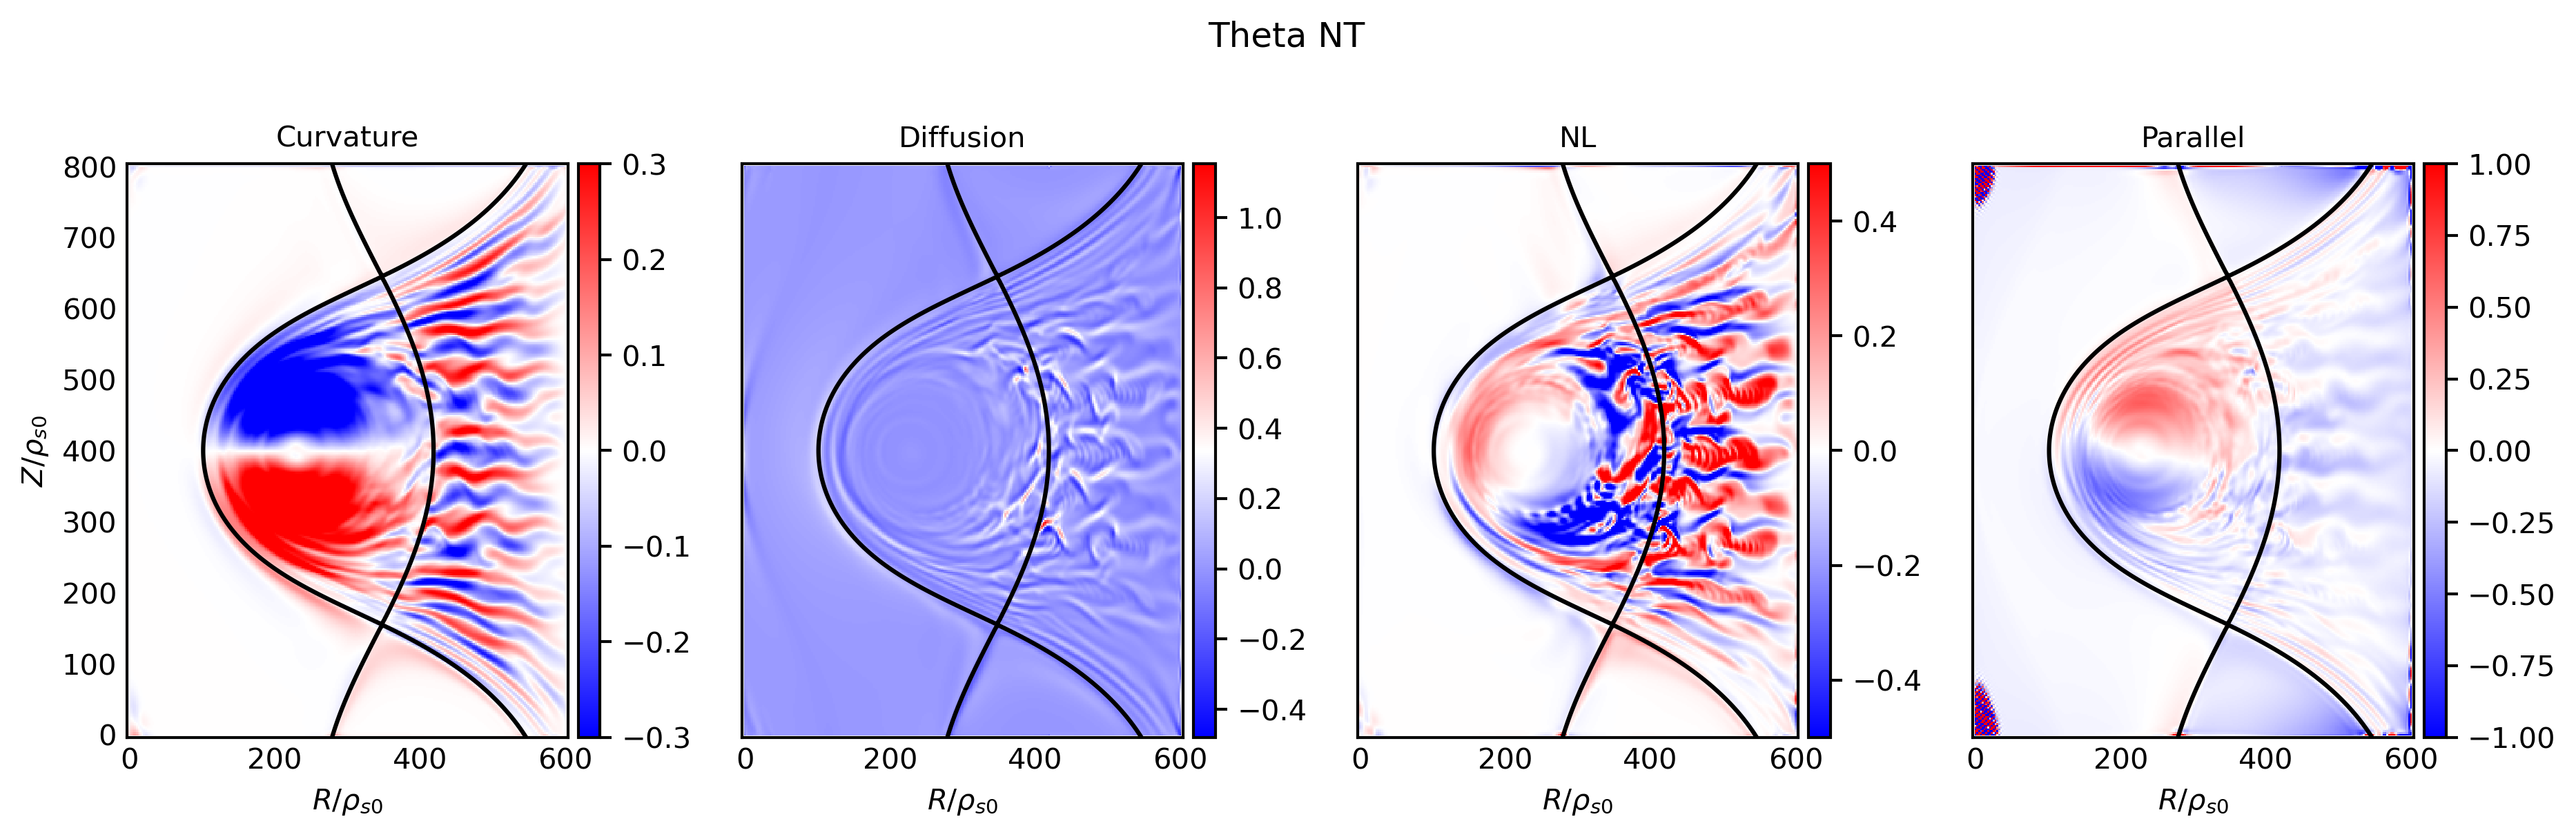

In [23]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(4*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\omega_{curv}$', r'$\omega_{curv}$', r'$\omega_{nl}$', r'$\omega_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, theta_cuxy_NT_avg, cmap='bwr', vmin=-0.3, vmax=0.3, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, theta_dixy_NT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, theta_nlxy_NT_avg, cmap='bwr', vmin=-0.5, vmax=0.5, rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, theta_paxy_NT_avg, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[2].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[3].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diffusion')
ax[2].set_title('NL')
ax[3].set_title('Parallel')

plt.suptitle('Theta NT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

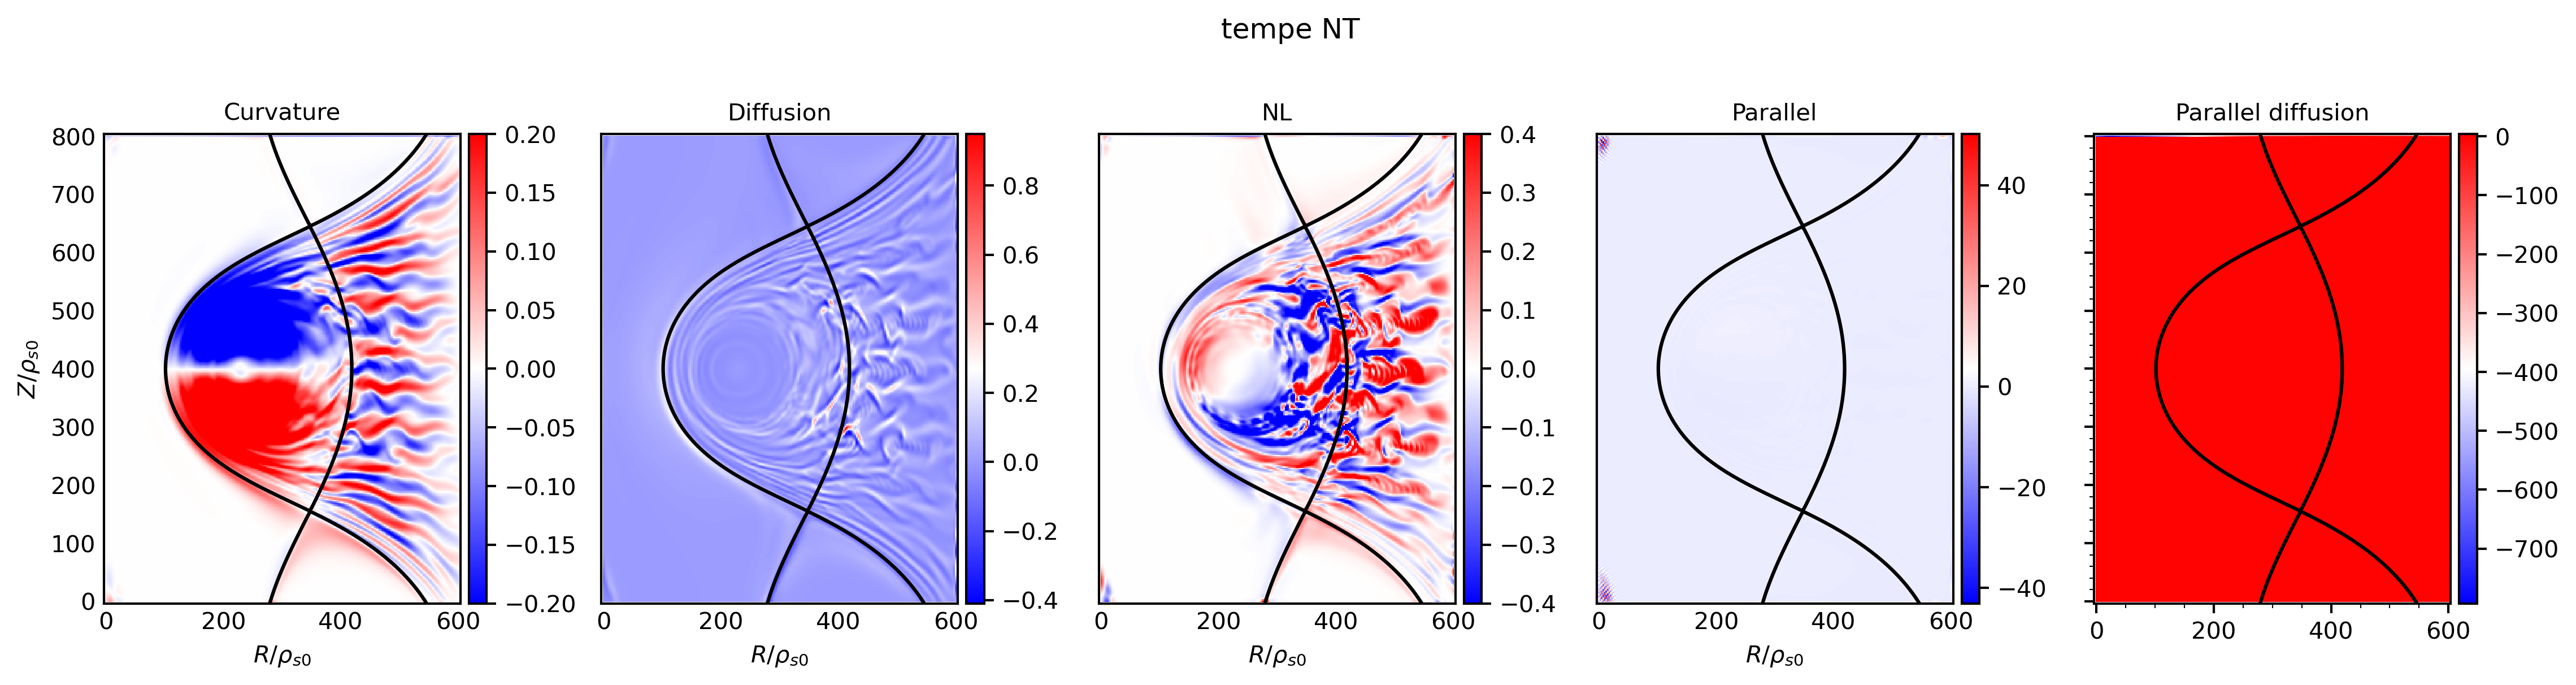

In [20]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(5*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\tempe_{curv}$', r'$\tempe_{curv}$', r'$\tempe_{nl}$', r'$\tempe_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, tempe_cuxy_NT_avg, cmap='bwr', vmin=-0.2, vmax=0.2, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, tempe_dixy_NT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, tempe_nlxy_NT_avg, cmap='bwr', vmin=-0.4, vmax=0.4, rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, tempe_paxy_NT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


cs4 = ax[4].pcolormesh(X_2D, Y_2D, tempe_pdxy_NT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[4])
cax4 = divider.append_axes('right', size='5%', pad=0.05)
cbar4 = fig.colorbar(cs4, cax=cax4, orientation='vertical')
cbar4.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[2].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[3].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[4].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diffusion')
ax[2].set_title('NL')
ax[3].set_title('Parallel')
ax[4].set_title('Parallel diffusion')

plt.suptitle('tempe NT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

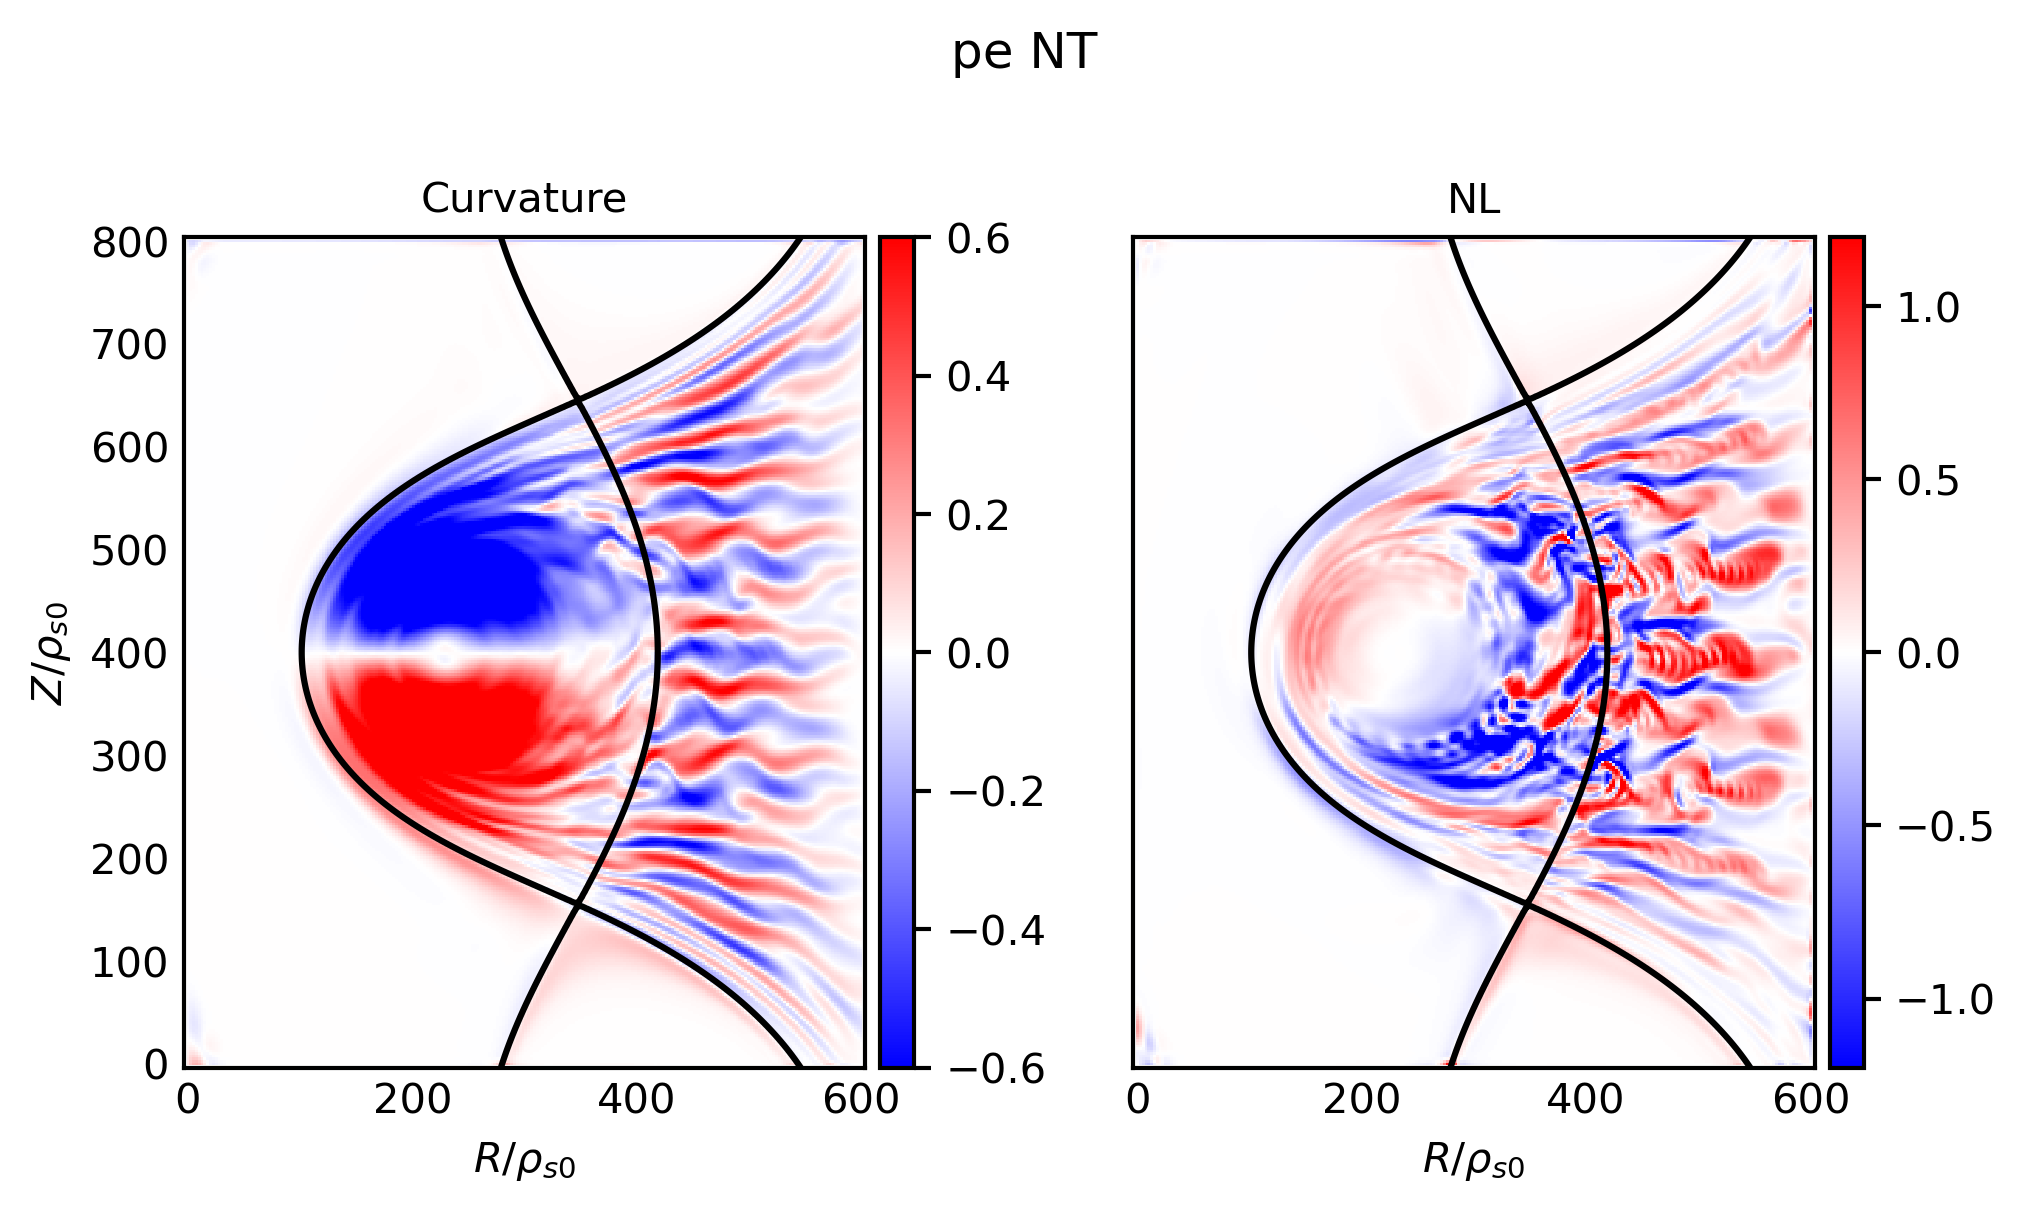

In [37]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(2*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

pe_cuxy_NT_avg = tempe_cuxy_NT_avg + theta_cuxy_NT_avg
pe_nlxy_NT_avg = tempe_nlxy_NT_avg + theta_nlxy_NT_avg

cs0 = ax[0].pcolormesh(X_2D, Y_2D, pe_cuxy_NT_avg, cmap='bwr', vmin=-0.6, vmax=0.6, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, pe_nlxy_NT_avg, cmap='bwr', vmin=-1.2, vmax=1.2, rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')


for i in range(2):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('NL')


plt.suptitle('pe NT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

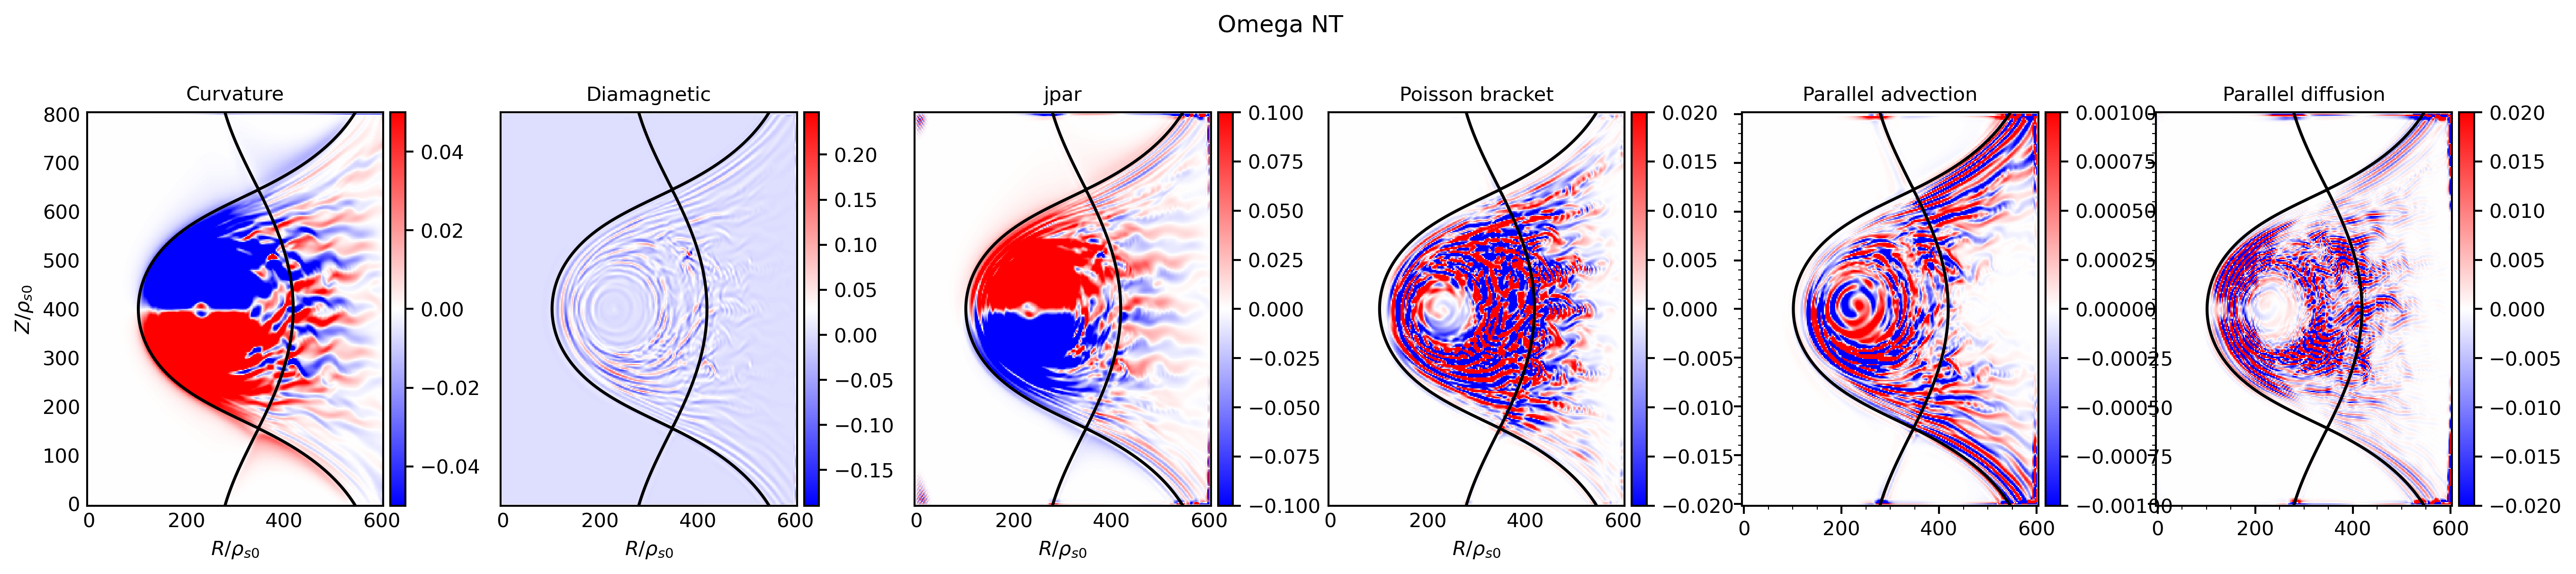

In [55]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(6*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\omega_{curv}$', r'$\omega_{curv}$', r'$\omega_{nl}$', r'$\omega_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, omega_cuxy_NT_avg, cmap='bwr', vmin=-0.05, vmax=0.05, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, omega_dixy_NT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, omega_jpxy_NT_avg, cmap='bwr', vmin=-0.1, vmax=0.1, rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, omega_nlxy_NT_avg, cmap='bwr', vmin=-0.02, vmax=0.02, rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


cs4 = ax[4].pcolormesh(X_2D, Y_2D, omega_paxy_NT_avg, cmap='bwr', vmin=-0.001, vmax=0.001, rasterized=True)
divider = make_axes_locatable(ax[4])
cax4 = divider.append_axes('right', size='5%', pad=0.05)
cbar4 = fig.colorbar(cs4, cax=cax4, orientation='vertical')
cbar4.ax.tick_params(labelsize=10)  # Adjusted size

cs5 = ax[5].pcolormesh(X_2D, Y_2D, omega_pdxy_NT_avg, cmap='bwr', vmin=-0.02, vmax=0.02, rasterized=True)
divider = make_axes_locatable(ax[5])
cax5 = divider.append_axes('right', size='5%', pad=0.05)
cbar5 = fig.colorbar(cs5, cax=cax5, orientation='vertical')
cbar5.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[2].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[3].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[4].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')
ax[5].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diamagnetic')
ax[2].set_title('jpar')
ax[3].set_title('Poisson bracket')
ax[4].set_title('Parallel advection')
ax[5].set_title('Parallel diffusion')

plt.suptitle('Omega NT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Figures for PT ($n$, $\omega$, $T_e$) </b></span><br>
</div>

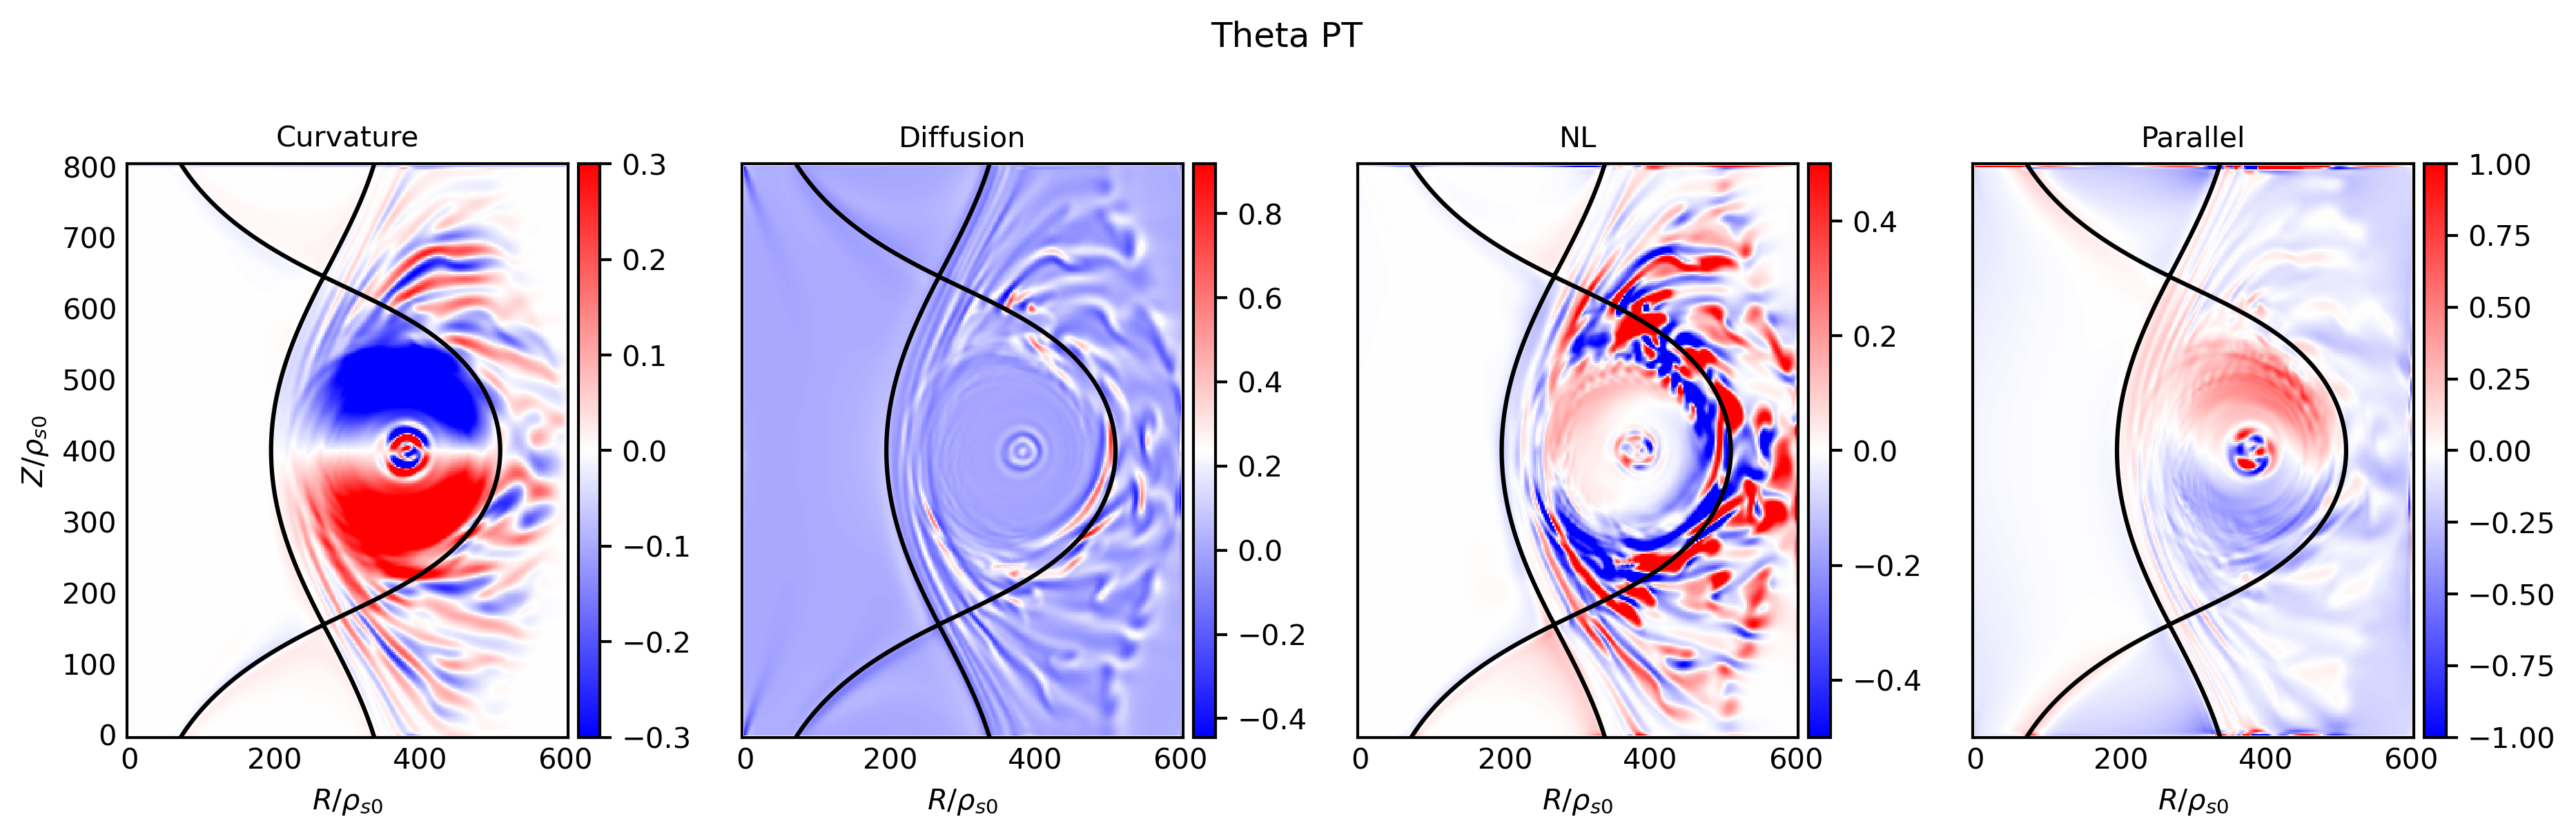

In [15]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(4*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\omega_{curv}$', r'$\omega_{curv}$', r'$\omega_{nl}$', r'$\omega_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, theta_cuxy_PT_avg, cmap='bwr', vmin=-0.3, vmax=0.3, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, theta_dixy_PT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, theta_nlxy_PT_avg, cmap='bwr', vmin=-0.5, vmax=0.5, rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, theta_paxy_PT_avg, cmap='bwr', vmin=-1, vmax=1, rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


ax[0].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[1].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diffusion')
ax[2].set_title('NL')
ax[3].set_title('Parallel')

plt.suptitle('Theta PT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

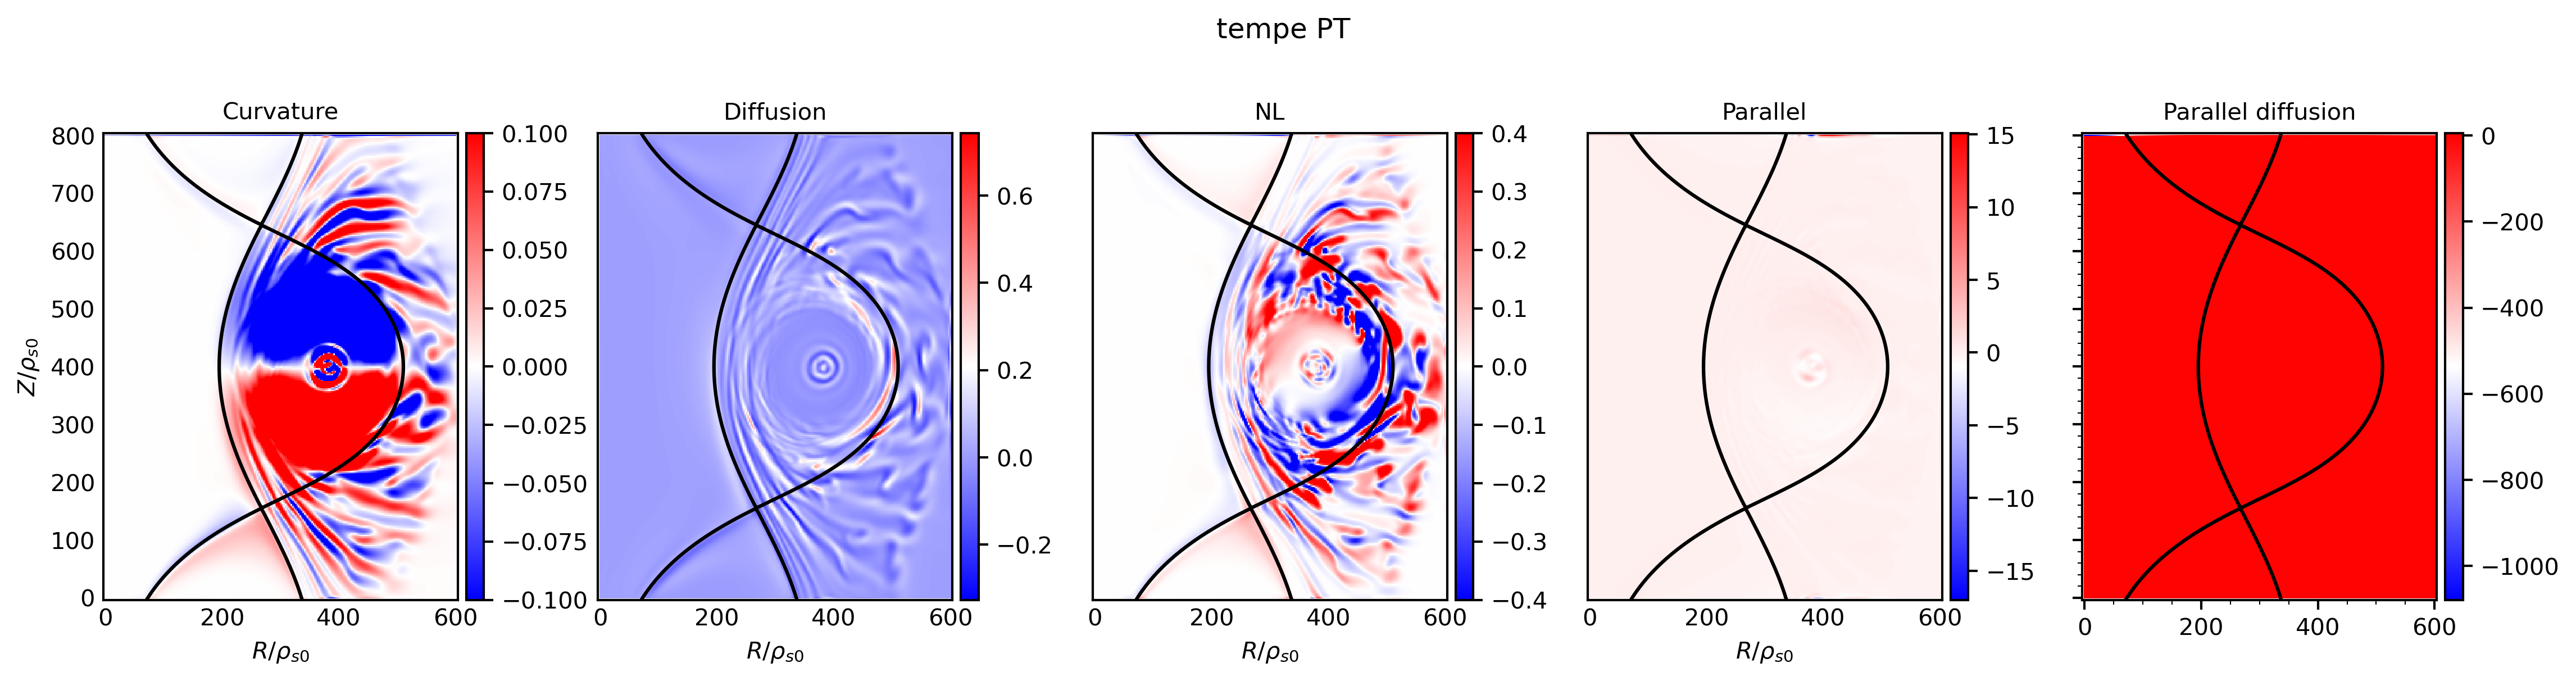

In [21]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(5*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\tempe_{curv}$', r'$\tempe_{curv}$', r'$\tempe_{nl}$', r'$\tempe_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, tempe_cuxy_PT_avg, cmap='bwr', vmin=-0.1, vmax=0.1, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, tempe_dixy_PT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, tempe_nlxy_PT_avg, cmap='bwr', vmin=-0.4, vmax=0.4, rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, tempe_paxy_PT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


cs4 = ax[4].pcolormesh(X_2D, Y_2D, tempe_pdxy_PT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[4])
cax4 = divider.append_axes('right', size='5%', pad=0.05)
cbar4 = fig.colorbar(cs4, cax=cax4, orientation='vertical')
cbar4.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[1].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[4].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diffusion')
ax[2].set_title('NL')
ax[3].set_title('Parallel')
ax[4].set_title('Parallel diffusion')

plt.suptitle('tempe PT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

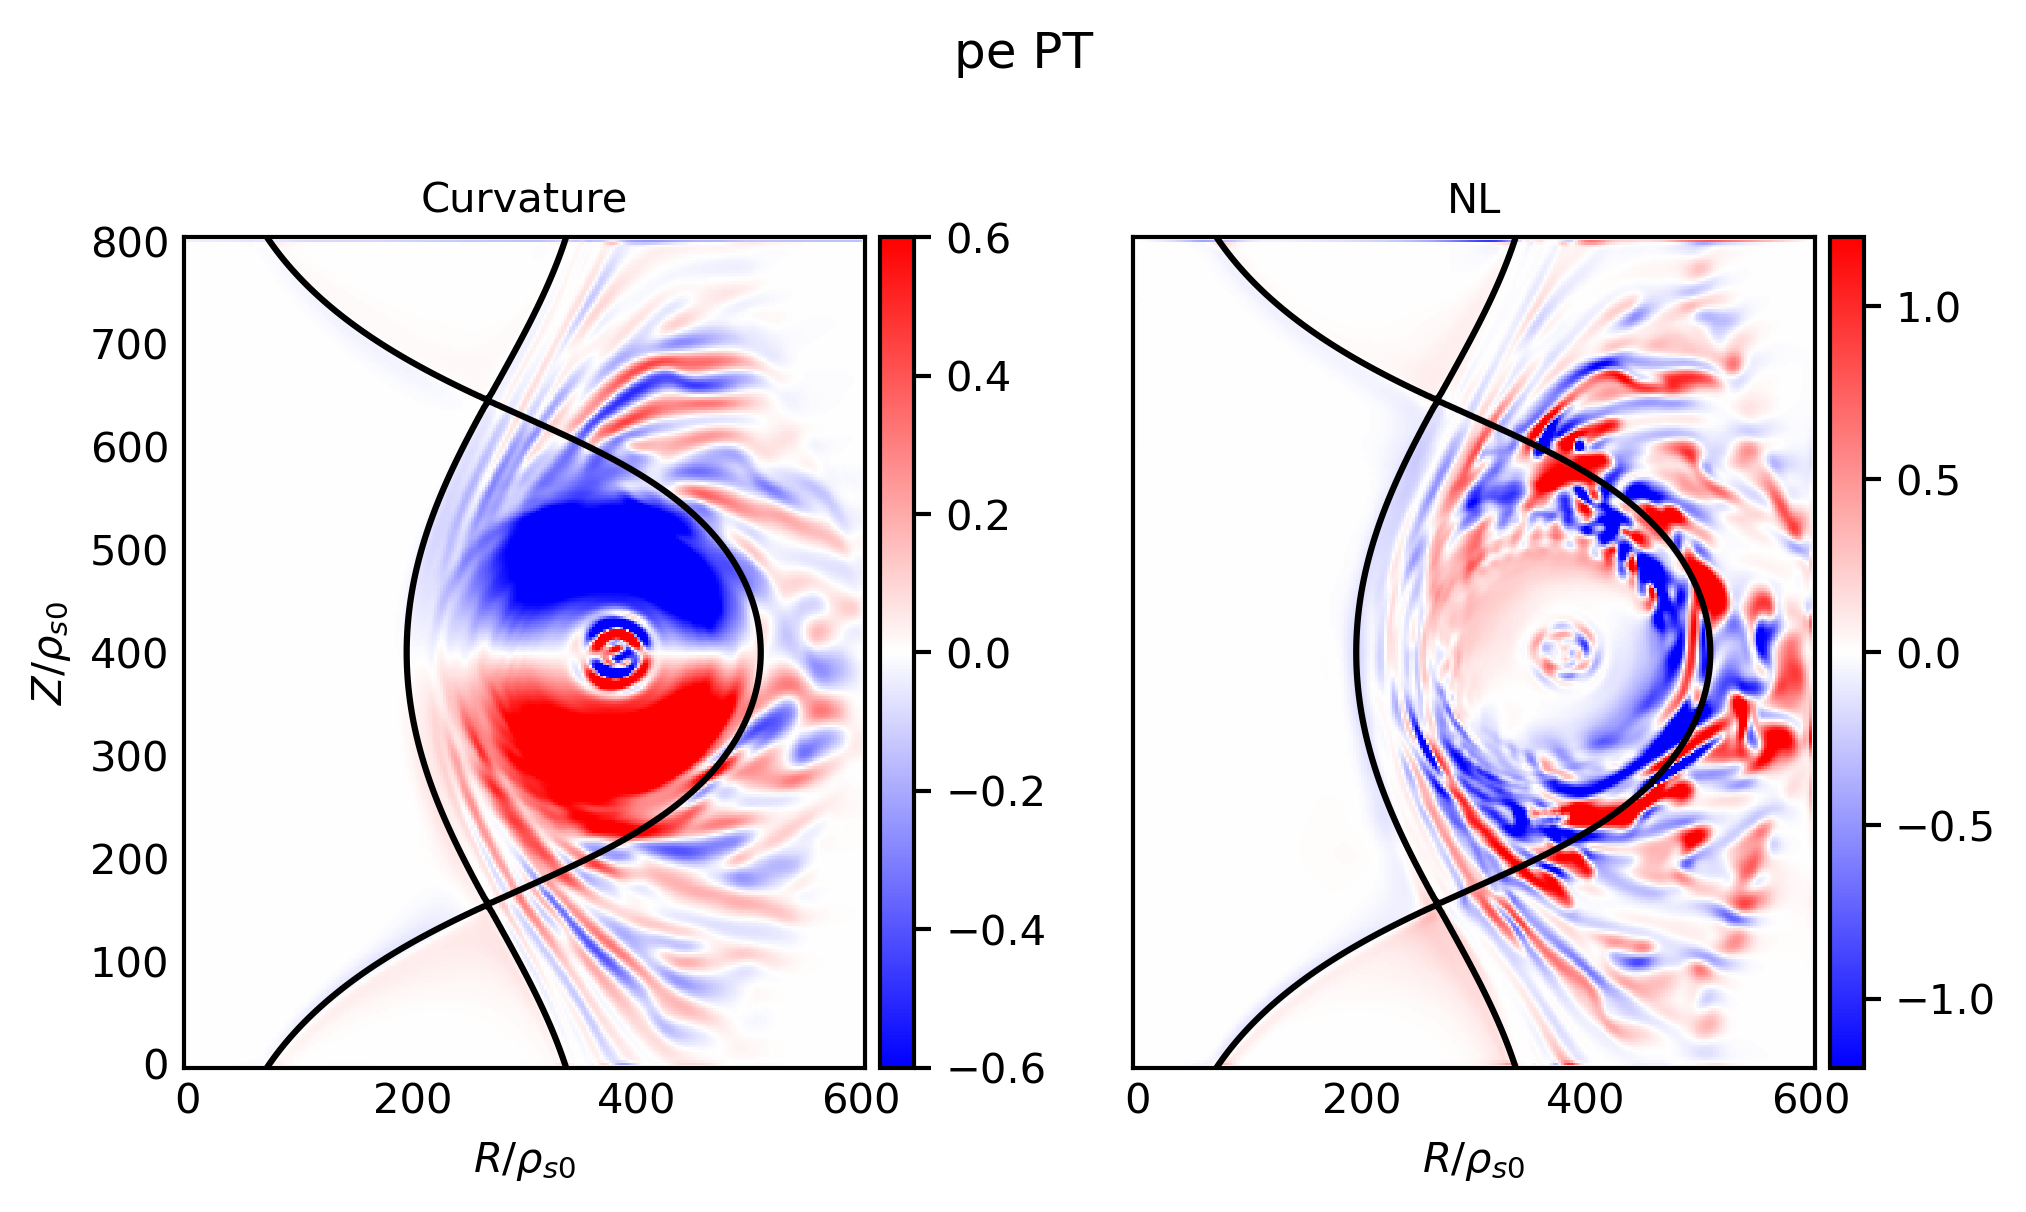

In [39]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(2*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

pe_cuxy_PT_avg = tempe_cuxy_PT_avg + theta_cuxy_PT_avg
pe_nlxy_PT_avg = tempe_nlxy_PT_avg + theta_nlxy_PT_avg

cs0 = ax[0].pcolormesh(X_2D, Y_2D, pe_cuxy_PT_avg, cmap='bwr', vmin=-0.6, vmax=0.6, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, pe_nlxy_PT_avg, cmap='bwr', vmin=-1.2, vmax=1.2, rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[1].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')


for i in range(2):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('NL')


plt.suptitle('pe PT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)

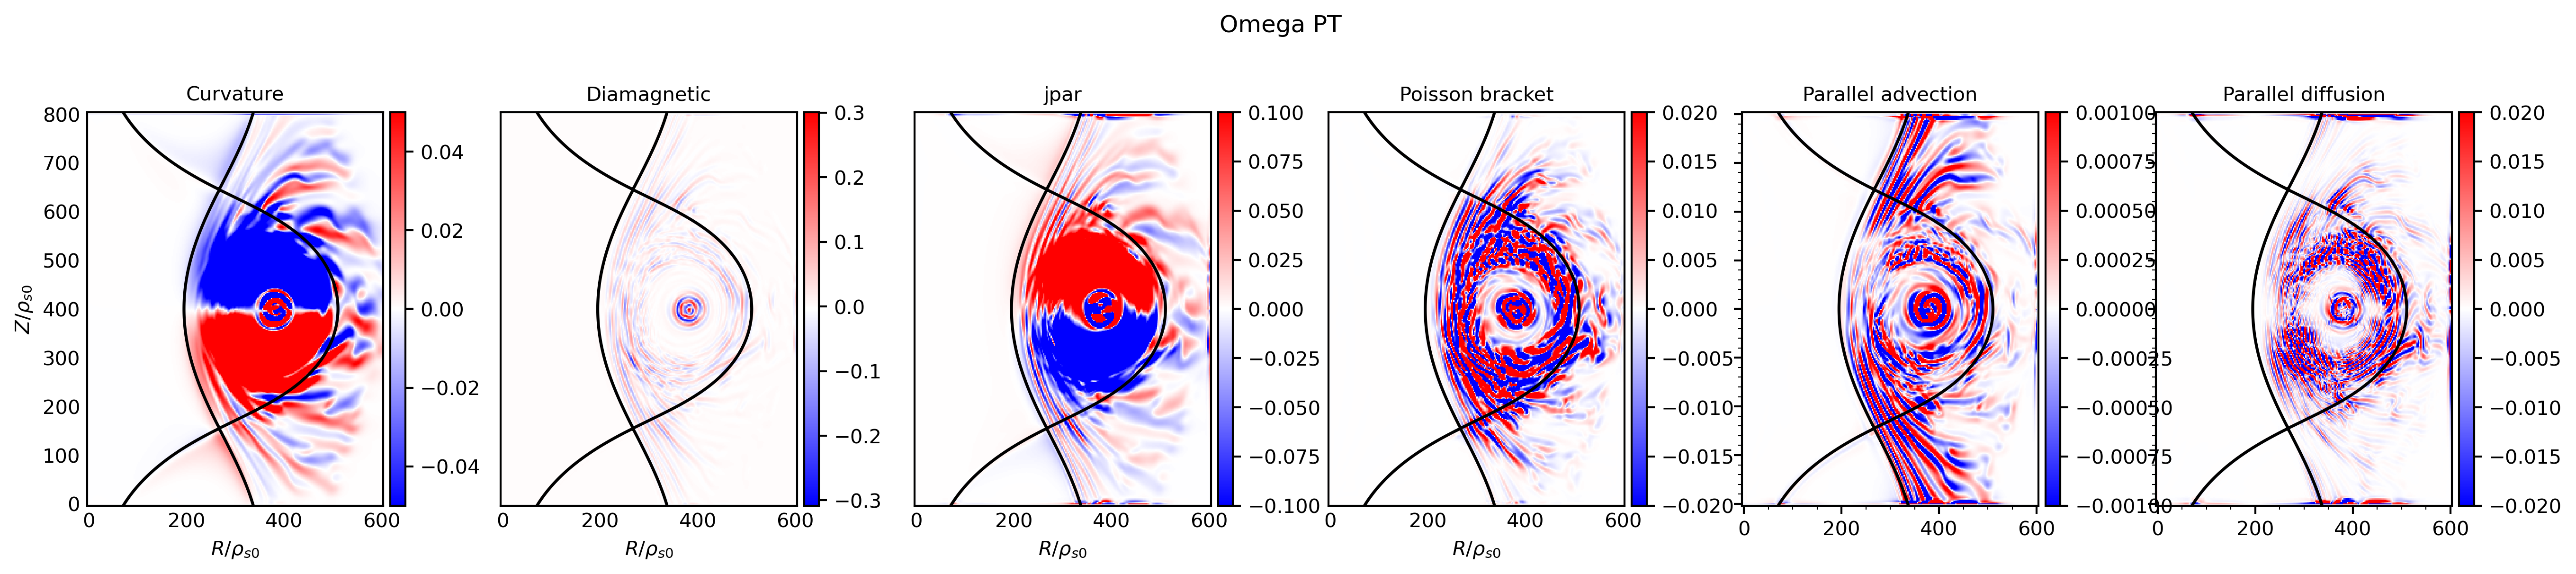

In [52]:
x_coord = np.linspace(0, 600, 240)
y_coord = np.linspace(0, 800, 320)
X_2D, Y_2D = np.meshgrid(x_coord, y_coord)
X, Y = np.meshgrid(s.x, s.y)

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(6*fig_width, 1.6*fig_height), sharex=True, sharey=True, dpi=300)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)

# Example data for color_maps
#titles = [r'$\omega_{curv}$', r'$\omega_{curv}$', r'$\omega_{nl}$', r'$\omega_{nl}$']


cs0 = ax[0].pcolormesh(X_2D, Y_2D, omega_cuxy_PT_avg, cmap='bwr', vmin=-0.05, vmax=0.05, rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
cbar0.ax.tick_params(labelsize=10)  # Adjusted size

cs1 = ax[1].pcolormesh(X_2D, Y_2D, omega_dixy_PT_avg, cmap='bwr', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=10)  # Adjusted size

cs2 = ax[2].pcolormesh(X_2D, Y_2D, omega_jpxy_PT_avg, cmap='bwr',  vmin=-0.1, vmax=0.1,  rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=10)  # Adjusted size

cs3 = ax[3].pcolormesh(X_2D, Y_2D, omega_nlxy_PT_avg, cmap='bwr', vmin=-0.02, vmax=0.02, rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
cbar3.ax.tick_params(labelsize=10)  # Adjusted size


cs4 = ax[4].pcolormesh(X_2D, Y_2D, omega_paxy_PT_avg, cmap='bwr',  vmin=-0.001, vmax=0.001, rasterized=True)
divider = make_axes_locatable(ax[4])
cax4 = divider.append_axes('right', size='5%', pad=0.05)
cbar4 = fig.colorbar(cs4, cax=cax4, orientation='vertical')
cbar4.ax.tick_params(labelsize=10)  # Adjusted size

cs5 = ax[5].pcolormesh(X_2D, Y_2D, omega_pdxy_PT_avg, cmap='bwr',  vmin=-0.02, vmax=0.02, rasterized=True)
divider = make_axes_locatable(ax[5])
cax5 = divider.append_axes('right', size='5%', pad=0.05)
cbar5 = fig.colorbar(cs5, cax=cax5, orientation='vertical')
cbar5.ax.tick_params(labelsize=10)  # Adjusted size

ax[0].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[1].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[4].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')
ax[5].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k')


for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(axis='both', which='both', direction="in", size=0.5)  # Adjusted size
    ax[i].set_xlabel(r'$R /\rho_{s0}$')
    #ax[i].set_title(titles[i])

ax[0].set_ylabel(r'$Z/\rho_{s0}$',rotation=90)
#plt.show()

ax[0].set_title('Curvature')
ax[1].set_title('Diamagnetic')
ax[2].set_title('jpar')
ax[3].set_title('Poisson bracket')
ax[4].set_title('Parallel advection')
ax[5].set_title('Parallel diffusion')

plt.suptitle('Omega PT', size=12, y=1.1)

# Save the figure
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("Snapshot.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=300)